In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn
import matplotlib.pyplot as plt # creating visualizations
import seaborn as sns # visualization library

In [14]:
data=pd.read_csv('Galton.txt', sep="\t")
print(data.head())

  Family  Father  Mother Gender  Height  Kids
0      1    78.5    67.0      M    73.2     4
1      1    78.5    67.0      F    69.2     4
2      1    78.5    67.0      F    69.0     4
3      1    78.5    67.0      F    69.0     4
4      2    75.5    66.5      M    73.5     4


In [15]:
data['Midparent'] = (data['Father']+data['Mother'])/2
print(data.head())

  Family  Father  Mother Gender  Height  Kids  Midparent
0      1    78.5    67.0      M    73.2     4      72.75
1      1    78.5    67.0      F    69.2     4      72.75
2      1    78.5    67.0      F    69.0     4      72.75
3      1    78.5    67.0      F    69.0     4      72.75
4      2    75.5    66.5      M    73.5     4      71.00


Simple Linear Regression intercept: 15.96711479477446
Simple Linear Regression slope: 0.721396400408444
Daughter height =  15.96711479477446 + 0.721396400408444 *Midparent
Simple Linear Regression MSE: 3.962318406346956


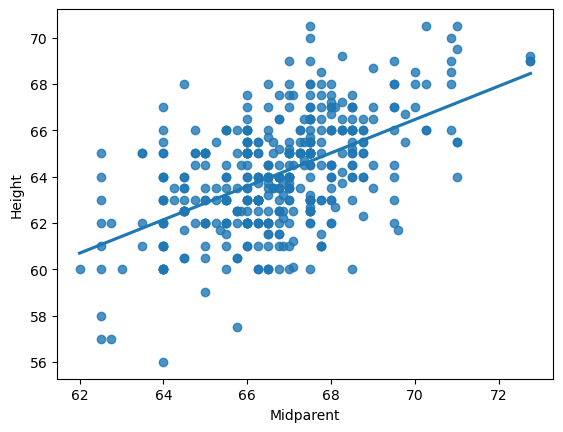

In [22]:
daughters_data = data[data['Gender']=='F']
daughters_model = LinearRegression()

x_train_daughters = daughters_data[['Midparent']]
y_train_daughters = daughters_data['Height']

daughters_model.fit(x_train_daughters, y_train_daughters)
print('Simple Linear Regression intercept:', daughters_model.intercept_)
print('Simple Linear Regression slope:', daughters_model.coef_[0])
print('Daughter height = ', daughters_model.intercept_,'+',daughters_model.coef_[0],'*Midparent')
y_predict = daughters_model.predict(x_train_daughters)

mse_daughters = mean_squared_error(y_train_daughters, y_predict)
print('Simple Linear Regression MSE:', mse_daughters)

sns.regplot(x=x_train_daughters, y=y_train_daughters, order=1, ci=None)
plt.show()

Simple linear regression intercept:  19.671518403227957
Simple linear regression slope:  0.7442525851182387
Sons height =  19.671518403227957 + 0.7442525851182387 *Midparent
Simple linear regression MSE:  5.268776374373856


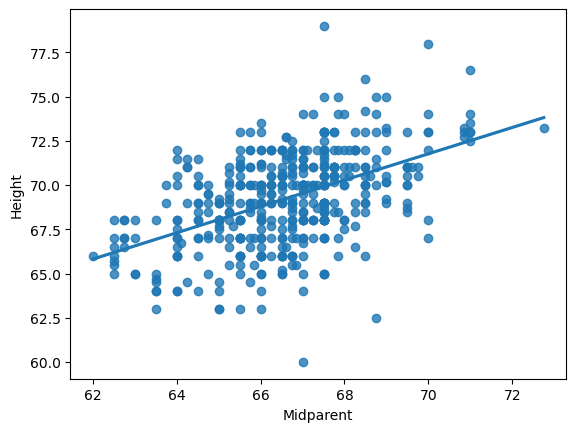

In [34]:
sons_data = data[data['Gender']=='M']
sons_model = LinearRegression()

x_train_sons = sons_data[['Midparent']]
y_train_sons = sons_data['Height']

sons_model.fit(x_train_sons, y_train_sons)
print('Simple linear regression intercept: ', sons_model.intercept_)
print('Simple linear regression slope: ', sons_model.coef_[0])
print('Sons height = ',sons_model.intercept_,'+',sons_model.coef_[0],'*Midparent')
y_predict = sons_model.predict(x_train_sons)

mse_sons = mean_squared_error(y_train_sons, y_predict)
print('Simple linear regression MSE: ',mse_sons)

sns.regplot(x=x_train_sons, y=y_train_sons, order=1, ci=None)
plt.show()

In [33]:
new_data = data.copy()

new_data['Gender'] = new_data['Gender'].apply(lambda x:1 if x=='M' else 0)
# 1 for male, 0 for female

x_train = new_data[['Father', 'Mother', 'Gender']]
y_train = new_data['Height']

glm_model = LinearRegression()
glm_model.fit(x_train,y_train)

print('Multiple linear regression intercept: ', glm_model.intercept_)
print('Multiple linear regression coefficient for Father: ', glm_model.coef_[0])
print('Multiple linear regression coefficient for Mother: ', glm_model.coef_[1])
print('Multiple linear regression coefficient for Gender: ', glm_model.coef_[2])
print('Children height =', glm_model.intercept_, '+', glm_model.coef_[0], '* Father', glm_model.coef_[1],'* Mother', glm_model.coef_[2],'* Gender')

new_sons_data = new_data[new_data['Gender']==1]
new_daughters_data = new_data[new_data['Gender']==0]
x_train_sons = new_sons_data[['Father','Mother','Gender']]
y_train_sons = new_sons_data['Height']
x_train_daughters = new_daughters_data[['Father','Mother','Gender']]
y_train_daughters = new_daughters_data['Height']
y_predict_sons = glm_model.predict(x_train_sons)
y_predict_daughters = glm_model.predict(x_train_daughters)

mse_sons_glm = mean_squared_error(y_train_sons, y_predict_sons)
print('Multiple linear regression MSE for sons: ', mse_sons_glm)
mse_daughters_glm = mean_squared_error(y_train_daughters, y_predict_daughters)
print('Multiple linear regression MSE for daughters: ', mse_daughters_glm)

Multiple linear regression intercept:  15.344760018811101
Multiple linear regression coefficient for Father:  0.4059780252911168
Multiple linear regression coefficient for Mother:  0.32149513509690314
Multiple linear regression coefficient for Gender:  5.225951310540902
Children height = 15.344760018811101 + 0.4059780252911168 * Father 0.32149513509690314 * Mother 5.225951310540902 * Gender
Multiple linear regression MSE for sons:  5.255184714468628
Multiple linear regression MSE for daughters:  3.938801717559351


In [ ]:
print(mse_sons_glm, mse_sons)
print(mse_daughters_glm, mse_daughters)
# Multiple linear regression of GLM is slightly better 